In [22]:
%matplotlib inline
import pylab as plt
import numpy as np
import math
from blimpy import Waterfall
from turbo_seti.find_doppler import kernels
from turbo_seti.find_doppler.find_doppler import FindDoppler

In [27]:
file='data/20200917_guppi_59143_54504_000454_J1939-6342_0001.rawspec.0000.fil'
on=Waterfall(file)
spectra=np.squeeze(on.data)
on.data.shape

(2032, 1, 3712)

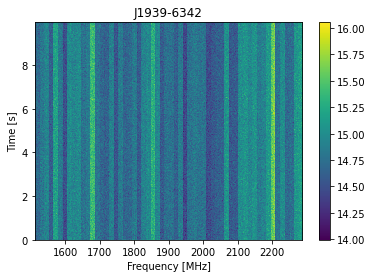

In [31]:
on.plot_waterfall()

In [30]:
fdop = FindDoppler(file,n_coarse_chan=64)
fdop.search()


turbo_seti version 2.0.19
blimpy version 2.0.12
h5py version 3.2.1

data_handler    INFO     Filterbank file detected. Attempting to create .h5 file in current directory...
blimpy.waterfall INFO     Conversion time: 1.00sec
find_doppler.63 INFO     {'DIMENSION_LABELS': array(['time', 'feed_id', 'frequency'], dtype=object), 'az_start': 0.0, 'data_type': 1, 'fch1': 1511.375, 'foff': 0.208984375, 'ibeam': -1, 'machine_id': 20, 'nbeams': 1, 'nbits': 32, 'nchans': 3712, 'nifs': 1, 'rawdatafile': 'guppi_59143_54504_000454_J1939-6342_0001.0000.raw', 'source_name': 'J1939-6342', 'src_dej': <Angle -63.66811111 deg>, 'src_raj': <Angle 19.68823611 hourangle>, 'telescope_id': -1, 'tsamp': 0.00489988785046729, 'tstart': 59143.630833333336, 'za_start': 0.0}
find_doppler.63 INFO     File: ./20200917_guppi_59143_54504_000454_J1939-6342_0001.rawspec.0000.h5
 drift rates (min, max): (0.000010, 4.000000)
 SNR: 25.000000

Starting ET search using ./20200917_guppi_59143_54504_000454_J1939-6342_0001.rawspe

In [17]:
!rm 20200917_guppi_59074_56719_004562_J0835-4510_0001-ics.rawspec.0000.combined.log
!rm 20200917_guppi_59074_56719_004562_J0835-4510_0001-ics.rawspec.0000.combined.dat
!rm 20200917_guppi_59074_56719_004562_J0835-4510_0001-ics.rawspec.0000.combined.h5

In [10]:
off = '/datax/scratch/jzhang/20200917_guppi_59143_54557_000456_J1939-6342_offset_0001.rawspec.0000.fil'
on = '/datax/scratch/jzhang/20200917_guppi_59143_54504_000454_J1939-6342_0001.rawspec.0000.fil'
on_1=Waterfall(on)
off_1=Waterfall(off)
plt.figure(dpi=100,figsize=(10,10))
plt.subplot(2,1,1)
on_1.plot_waterfall()
plt.subplot(2,1,2)
off_1.plot_waterfall()
plt.show()

In [8]:
on_1.file_header

{'machine_id': 20,
 'telescope_id': -1,
 'src_raj': <Angle 19.68823611 hourangle>,
 'src_dej': <Angle -63.66811111 deg>,
 'az_start': 0.0,
 'za_start': 0.0,
 'data_type': 1,
 'fch1': 1511.375,
 'foff': 0.208984375,
 'nchans': 3712,
 'nbeams': 1,
 'ibeam': -1,
 'nbits': 32,
 'tstart': 59143.630833333336,
 'tsamp': 0.00489988785046729,
 'nifs': 1,
 'source_name': 'J1939-6342',
 'rawdatafile': 'guppi_59143_54504_000454_J1939-6342_0001.0000.raw'}